# Notebook responsável por gerar o modelo de médias móveis

In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sktime.datasets import load_airline

## Geração da visualização dos dados "Box & Jenkins airline data"

In [2]:
y = load_airline()
df = y.to_frame().reset_index()
df

,Period,Number of airline passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0


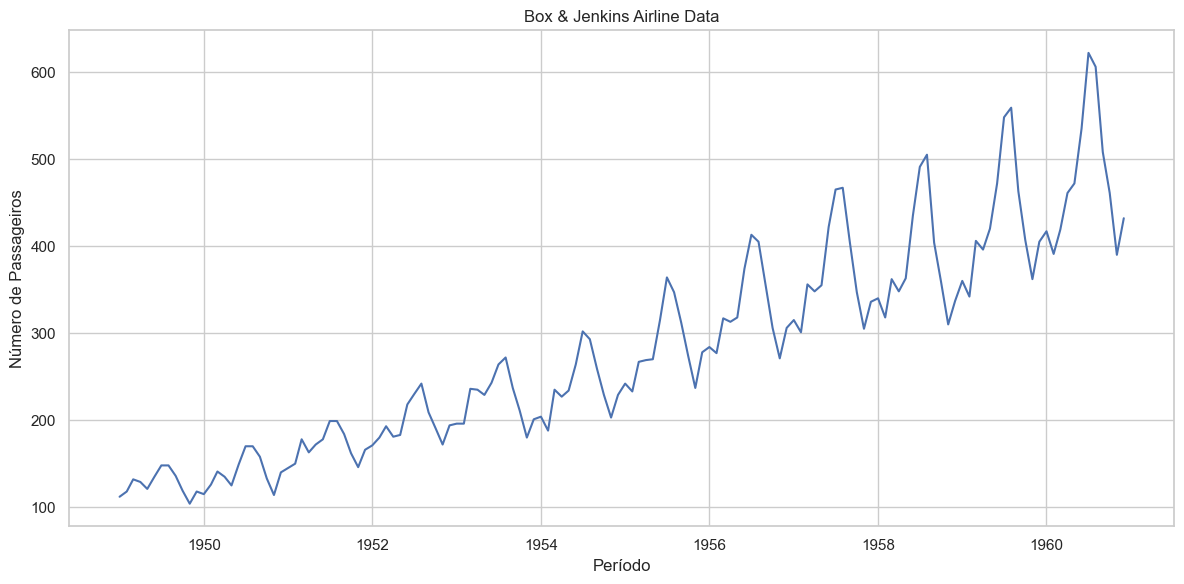

In [3]:
# Configurando o estilo do gráfico
sns.set(style="whitegrid")

# Convertendo os períodos para datetime para facilitar a visualização
df['Period'] = df['Period'].dt.to_timestamp()

# Criando a visualização
plt.figure(figsize=(12, 6))
sns.lineplot(x="Period", y='Number of airline passengers', data=df)
plt.title('Box & Jenkins Airline Data')
plt.xlabel('Período')
plt.ylabel('Número de Passageiros')

plt.tight_layout()

# Salvando a figura no diretório especificado
plt.savefig('../figs/06 - Box_Jenkins_Airline_Data.png')

# Exibindo o gráfico
plt.show()

## Construindo o forecast usando média simples (últimos 12 meses, forecast de 12 meses)

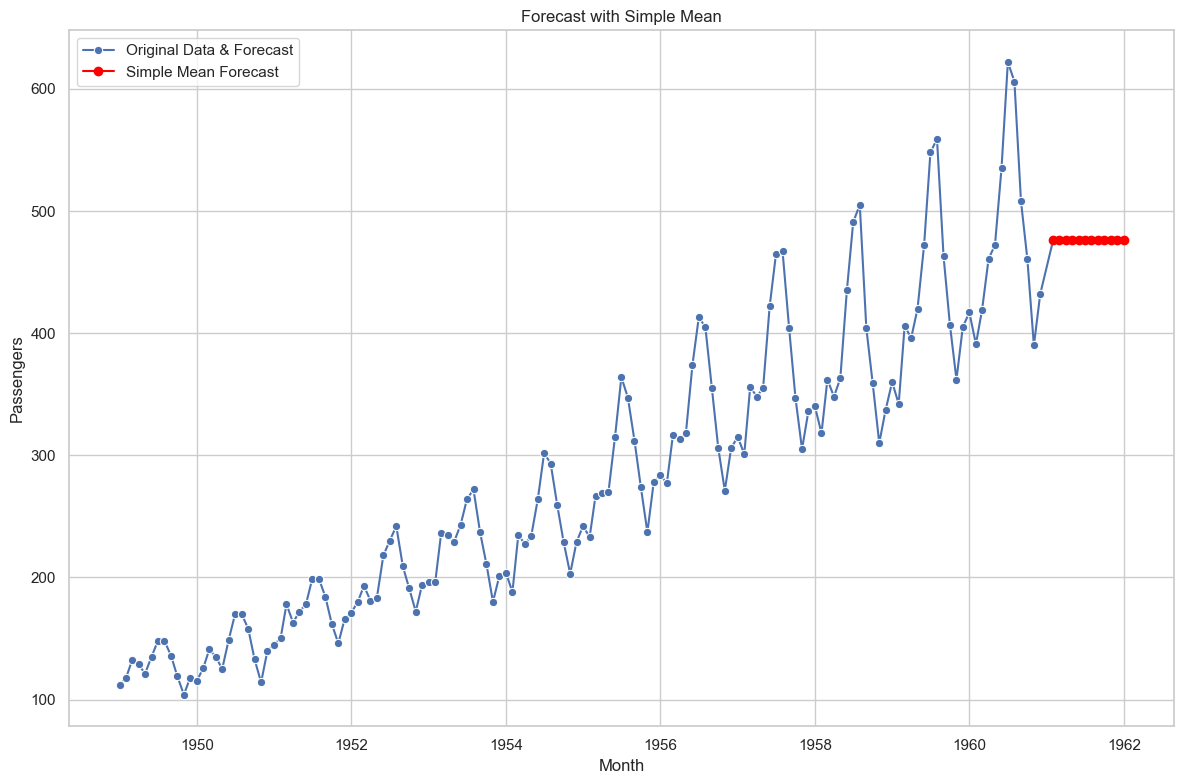

<Figure size 640x480 with 0 Axes>

In [4]:
# Cálculo da média dos últimos 12 meses
mean_forecast = np.mean(df['Number of airline passengers'][-12:])

# Previsões para os próximos 12 meses
simple_forecast = np.full(shape=12, fill_value=mean_forecast)

# Preparar DataFrame para plotagem
forecast_index = pd.date_range(start=df['Period'].iloc[-1] + pd.DateOffset(months=1), periods=12, freq='M')
forecast_df = pd.DataFrame({'Period': forecast_index, 'Number of airline passengers': simple_forecast})

# Concatenar os dados originais com a previsão
full_df = pd.concat([df, forecast_df], ignore_index=True)

# Plotting the forecast using seaborn
plt.figure(figsize=(12, 8))
sns.lineplot(data=full_df, x='Period', y='Number of airline passengers', marker='o', label='Original Data & Forecast')
plt.plot(forecast_index, simple_forecast, label='Simple Mean Forecast', color='red', marker='o')
plt.title('Forecast with Simple Mean')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.tight_layout()
plt.show()

# Salvando a figura no diretório especificado
plt.savefig('../figs/07 - Forecast mean.png')

In [5]:
full_df

,Period,Number of airline passengers
0,1949-01-01,112.000000
1,1949-02-01,118.000000
2,1949-03-01,132.000000
3,1949-04-01,129.000000
4,1949-05-01,121.000000
...,...,...
151,1961-08-31,476.166667
152,1961-09-30,476.166667
153,1961-10-31,476.166667
154,1961-11-30,476.166667


## Construindo o forecast usando média móvel simples (últimos 12 meses, forecast de 12 meses)

In [6]:
full_df

,Period,Number of airline passengers
0,1949-01-01,112.000000
1,1949-02-01,118.000000
2,1949-03-01,132.000000
3,1949-04-01,129.000000
4,1949-05-01,121.000000
...,...,...
151,1961-08-31,476.166667
152,1961-09-30,476.166667
153,1961-10-31,476.166667
154,1961-11-30,476.166667


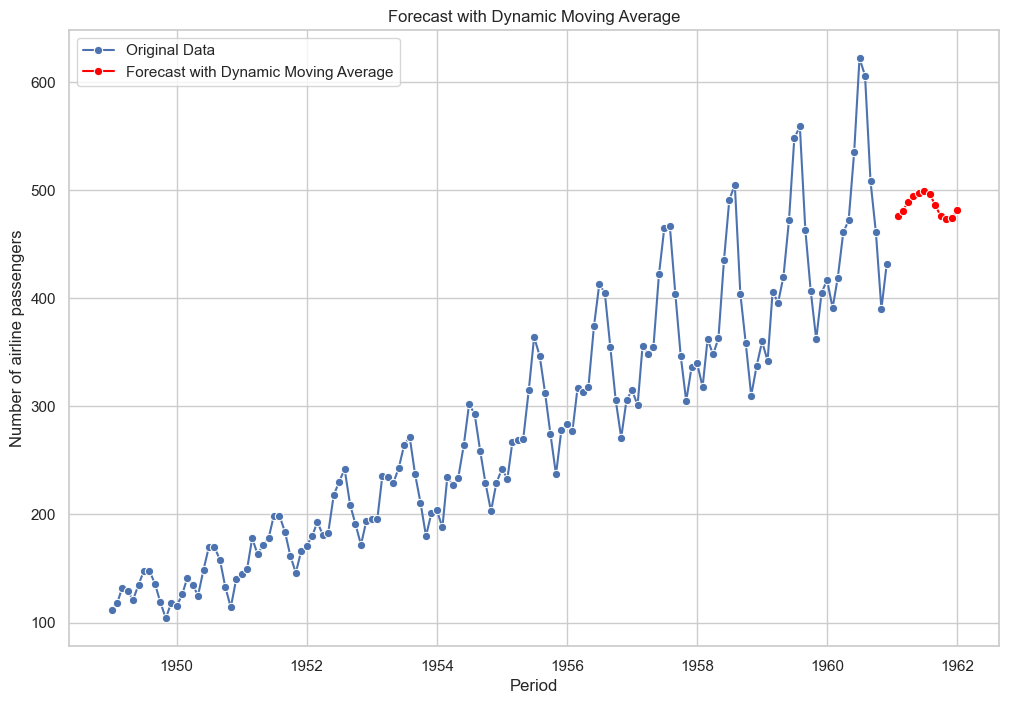

<Figure size 640x480 with 0 Axes>

In [7]:
# Inicializando o DataFrame de previsão
forecast_period = pd.date_range(start=df['Period'].iloc[-1] + pd.DateOffset(months=1), periods=12, freq='M')
forecast_df = pd.DataFrame({
    'Period': forecast_period,
    'Number of airline passengers': np.nan  # inicialmente NaN
})

# Concatenar os dados originais com a previsão
full_df = pd.concat([df, forecast_df], ignore_index=True)

# Cálculo de média móvel dinâmica para a previsão
for i in range(len(df), len(full_df)):
    current_window = full_df['Number of airline passengers'].iloc[i-12:i]
    forecast_value = current_window.mean()
    full_df.loc[i, 'Number of airline passengers'] = forecast_value

# Separar dados originais e de previsão para plotagem
original_data = full_df.iloc[:len(df)]
forecast_data = full_df.iloc[len(df):]

# Plotting the forecast using seaborn
plt.figure(figsize=(12, 8))
sns.lineplot(data=original_data, x='Period', y='Number of airline passengers', marker='o', label='Original Data')
sns.lineplot(data=forecast_data, x='Period', y='Number of airline passengers', marker='o', color='red', label='Forecast with Dynamic Moving Average')
plt.title('Forecast with Dynamic Moving Average')
plt.xlabel('Period')
plt.ylabel('Number of airline passengers')
plt.legend()
plt.show()

# Salvando a figura no diretório especificado
plt.savefig('../figs/08 - Forecast moving average.png')